In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,10]

import warnings
warnings.filterwarnings("ignore")
import statistics
import scipy
from scipy import stats
from scipy.stats import chi2_contingency,ttest_ind
from scipy.stats import chi2
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split


# import StandardScaler to perform scaling
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,recall_score,f1_score,precision_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

In [2]:
dfc=pd.read_csv('df_clean22')
dfc.head()

,grade,loan_status,term_ 60 months,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,...,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,1.0,0,0,0,0,1,0,0,0,1,...,-0.416548,1.343573,1.082947,0.978398,0.0,1.962487,-0.519393,0.012913,-1.312751,0.0
1,1.0,0,0,0,0,1,0,0,0,0,...,-0.674239,-0.148603,0.564184,1.181469,0.0,0.497493,-0.051272,0.186740,0.761759,0.0
2,1.0,0,0,1,0,1,0,0,0,1,...,0.300342,-0.778273,-0.582295,0.369188,0.0,-0.237260,1.532197,0.099826,-1.312751,0.0
3,0.0,0,0,0,0,1,0,0,0,1,...,-0.856117,-0.464256,-1.843916,-1.052303,0.0,-0.825044,-1.345728,-1.030046,-1.312751,0.0
4,2.0,1,1,0,1,1,0,0,0,0,...,0.713779,-0.435560,2.037520,0.369188,0.0,0.899243,0.620379,1.577352,0.761759,0.0


In [3]:
dfc.shape

(325733, 37)

In [4]:
df2_feature=dfc.drop(['loan_status','pub_rec','pub_rec_bankruptcies'],axis=1)
df2_target=dfc['loan_status']

In [5]:
x=df2_feature
y=df2_target

In [6]:
x_train,x_test,y_train,y_test=train_test_split(df2_feature,df2_target,test_size=0.3,random_state=42)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (228013, 34)
x_test (97720, 34)
y_train (228013,)
y_test (97720,)


In [7]:
clfs={'Logestic Regression':LogisticRegression(),
     'KNeighborsClassifier':KNeighborsClassifier(),
     'GaussianNB':GaussianNB(),
     'Decision Tree':DecisionTreeClassifier(),
     'Random Forest':RandomForestClassifier(),
     'Ada Boost':AdaBoostClassifier(),
     'Gradient Boost':GradientBoostingClassifier(),
     'XG Boost':XGBClassifier()}

model=pd.DataFrame(columns=['model_name','roc_auc','accuracy','recall','precission','f1_score'])
for clf,clfs_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("Fiiting Model.......",clfs_name)
    t={'model_name':clfs_name,
      'roc_auc':roc_auc_score(y_test,y_pred),
      'accuracy':accuracy_score(y_test,y_pred),
      'recall':recall_score(y_test,y_pred),
      'precission':precision_score(y_test,y_pred),
      'f1_score':f1_score(y_test,y_pred)}
    model=model.append(t,ignore_index=True)

model=model.sort_values('f1_score',ascending=False)
model

Fiiting Model....... Logestic Regression
Fiiting Model....... KNeighborsClassifier
Fiiting Model....... GaussianNB
Fiiting Model....... Decision Tree
Fiiting Model....... Random Forest
Fiiting Model....... Ada Boost
Fiiting Model....... Gradient Boost
Fiiting Model....... XG Boost


,model_name,roc_auc,accuracy,recall,precission,f1_score
2,GaussianNB,0.6184,0.727118,0.440019,0.344423,0.386396
3,Decision Tree,0.551922,0.707644,0.296421,0.271923,0.283644
1,KNeighborsClassifier,0.548641,0.781355,0.166815,0.367934,0.229554
7,XG Boost,0.538228,0.806918,0.097374,0.530403,0.164541
0,Logestic Regression,0.531447,0.806386,0.080342,0.527711,0.139452
4,Random Forest,0.531565,0.806703,0.080132,0.533496,0.139336
5,Ada Boost,0.525094,0.806222,0.063833,0.531646,0.113981
6,Gradient Boost,0.525502,0.807388,0.062995,0.560373,0.113257


In [ ]:
# here we got GaussianNB, DecisionTree and KNeighborsClassifier are the top 3 models 

In [7]:
def get_train_report(model,x_train):
    
    train_pred = model.predict(x_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [8]:
def get_test_report(model,x_test):
    
    test_pred = model.predict(x_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [9]:
def plot_roc(model, test_data):
    

    y_pred_prob = model.predict_proba(test_data)[:,1]
    
   
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

   
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

# GaussianNB Model

In [10]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
y_pred_gn=gnb_model.predict(x_test)

train_report = get_train_report(gnb_model,x_train)
print('Train data:\n', train_report)

test_report = get_test_report(gnb_model,x_test)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83    183686
           1       0.35      0.44      0.39     44327

    accuracy                           0.73    228013
   macro avg       0.60      0.62      0.61    228013
weighted avg       0.76      0.73      0.74    228013

Test data:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82     78639
           1       0.34      0.44      0.39     19081

    accuracy                           0.73     97720
   macro avg       0.60      0.62      0.61     97720
weighted avg       0.75      0.73      0.74     97720



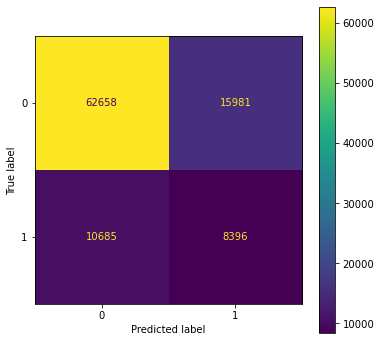

In [12]:
plt.rcParams['figure.figsize']=[6,6]
cm = confusion_matrix(y_test,y_pred_gn)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
# 

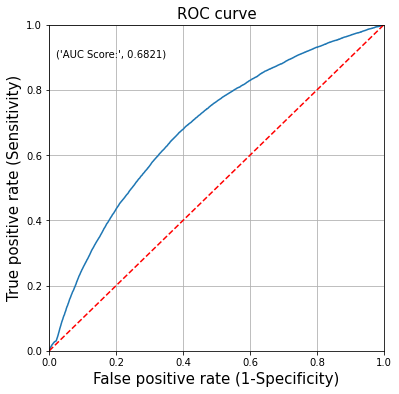

In [11]:
plt.rcParams['figure.figsize']=[6,6]
plot_roc(gnb_model,x_test)

# GaussianNB Model after tuning

In [16]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)

In [24]:
gb=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=200)}
gs_NB = GridSearchCV(estimator=gb, param_grid=params_NB, cv=kf,verbose=1,scoring='recall')
gs_NB.fit(x,y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.01101825e-01, 8.11984499e-01, 7.31680714e-01,
       6.59318827e-01, 5.94113398e-01, 5.35356668e-01, 4.82410870e-01,
       4.34701316e-01, 3.91710149e-01, 3.52970730e-01, 3.18062569e-01,
       2.86606762e-01, 2.58261876e-01, 2.32720248e-01, 2.097...
       1.09698580e-08, 9.88495905e-09, 8.90735464e-09, 8.02643352e-09,
       7.23263390e-09, 6.51733960e-09, 5.87278661e-09, 5.29197874e-09,
       4.76861170e-09, 4.29700470e-09, 3.87203878e-09, 3.48910121e-09,
       3.14403547e-09, 2.83309610e-09, 2.55290807e-09, 2.30043012e-09,
       2.07292178e-09, 1.86791360e-09, 1.68318035e-09, 1.51671689e-09,
       1.36671636e-09, 1.23155060e-09, 1.10975250e-09, 1.00000000e-09])},
             scoring='recall', verbose=1)

In [27]:
gs_NB.best_params_

{'var_smoothing': 7.149428986597577e-08}

In [17]:
gnbt = GaussianNB(var_smoothing=7.149428986597577e-08)
gnbt_model = gnbt.fit(x_train, y_train)
y_pred_gntt=gnbt_model.predict(x_test)

train_report = get_train_report(gnbt_model,x_train)
print('Train data:\n', train_report)

test_report = get_test_report(gnbt_model,x_test)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83    183686
           1       0.35      0.44      0.39     44327

    accuracy                           0.73    228013
   macro avg       0.60      0.62      0.61    228013
weighted avg       0.76      0.73      0.74    228013

Test data:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82     78639
           1       0.34      0.44      0.39     19081

    accuracy                           0.73     97720
   macro avg       0.60      0.62      0.61     97720
weighted avg       0.75      0.73      0.74     97720



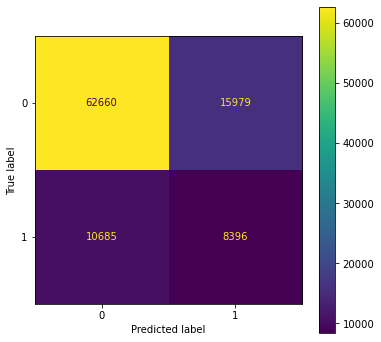

In [18]:
plt.rcParams['figure.figsize']=[6,6]
cm = confusion_matrix(y_test,y_pred_gntt)
ConfusionMatrixDisplay(cm).plot()
plt.show()

# KNeighbors Model after tuning

In [18]:
knn = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidea']
     }
                   
# with GridSearch
grid_knn = GridSearchCV(estimator=knn,
    param_grid=parameters_KNN,
    n_jobs = -1,
    cv = kf)

    
grid_knn.fit(x_train, y_train)

grid_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

In [19]:
knn_hy = KNeighborsClassifier(n_neighbors=15,
                 metric='minkowski',
                 weights='uniform')
knn_model = knn_hy.fit(x_train, y_train)
y_pred_knt=knn_model.predict(x_test)

train_report = get_train_report(knn_model,x_train)
print('Train data:\n', train_report)

test_report = get_test_report(knn_model,x_test)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.82      0.98      0.90    183686
           1       0.61      0.13      0.22     44327

    accuracy                           0.82    228013
   macro avg       0.72      0.56      0.56    228013
weighted avg       0.78      0.82      0.76    228013

Test data:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     78639
           1       0.45      0.10      0.16     19081

    accuracy                           0.80     97720
   macro avg       0.63      0.54      0.53     97720
weighted avg       0.75      0.80      0.75     97720



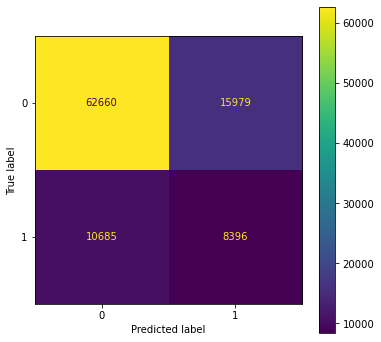

In [15]:
plt.rcParams['figure.figsize']=[6,6]
cm = confusion_matrix(y_test,y_pred_knt)
ConfusionMatrixDisplay(cm).plot()
plt.show()

# Boosting Models

# XG Boost using RFE

In [11]:
# initiate linear regression model to use in feature selection
xgboost_rfe = XGBClassifier(learning_rate=0.1, gamma = 1)

# build the RFE model

rfe_model = RFE(estimator=xgboost_rfe, n_features_to_select = 12)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(x_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE

feat_index = pd.Series(data = rfe_model.ranking_, index = x_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['grade', 'term_ 60 months', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'home_ownership_RENT', 'purpose_small_business', 'loan_amnt',
       'int_rate', 'annual_inc', 'dti', 'mort_acc'],
      dtype='object')


In [21]:
new_X_train = x_train[['grade', 'term_ 60 months', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'home_ownership_RENT', 'purpose_small_business', 'loan_amnt',
       'int_rate', 'annual_inc', 'dti', 'mort_acc']]
# store the X_train with significant variables in new_X_test
new_X_test = x_test[['grade', 'term_ 60 months', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'home_ownership_RENT', 'purpose_small_business', 'loan_amnt',
       'int_rate', 'annual_inc', 'dti', 'mort_acc']]


xgb_model = XGBClassifier(learning_rate=0.1,max_depth = 10, gamma = 1)
xgb_model.fit(new_X_train, y_train)
y_pred_xg=xgb_model.predict(new_X_test)

train_report = get_train_report(xgb_model,new_X_train)
print('Train data:\n', train_report)

test_report = get_test_report(xgb_model,new_X_test)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90    183686
           1       0.79      0.14      0.24     44327

    accuracy                           0.83    228013
   macro avg       0.81      0.57      0.57    228013
weighted avg       0.82      0.83      0.77    228013

Test data:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     78639
           1       0.53      0.09      0.15     19081

    accuracy                           0.81     97720
   macro avg       0.67      0.53      0.52     97720
weighted avg       0.76      0.81      0.75     97720



# XG Boost after oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler


In [ ]:
ros=RandomOverSampler(random_state=10,sampling_strategy=0.25)
X_train_resampled,y_train_resampled=ros.fit_resample(new_X_train,y_train)

In [28]:
xgb_model_resampled = XGBClassifier(learning_rate=0.1,max_depth = 12, gamma = 1)

# fit the model using fit() on train data
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

# compute the performance measures on train data
train_report = get_train_report(xgb_model_resampled,new_X_train)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(xgb_model_resampled,new_X_test)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.94      0.78      0.86    183686
           1       0.47      0.80      0.59     44327

    accuracy                           0.79    228013
   macro avg       0.71      0.79      0.72    228013
weighted avg       0.85      0.79      0.80    228013

Test data:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79     78639
           1       0.33      0.56      0.42     19081

    accuracy                           0.69     97720
   macro avg       0.60      0.64      0.61     97720
weighted avg       0.77      0.69      0.72     97720



# XG Boost after tuning

In [ ]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'min_child_weight':range(1,5),
                     'gamma': [0, 1, 2, 3, 4],
                    'tree_method':['gpu_hist','hist'],
                     'subsample':[0.25,0.5,1],
                     'colsample_bytree':[0.25,0.5,1]
                    }


# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()


xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv =kf)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

In [7]:
xgb_model_hy = XGBClassifier(colsample_bytree= 1, gamma= 1,
learning_rate= 0.4, max_depth=4, min_child_weight=4, subsample=1, 
                                          tree_method='hist')

In [13]:

xgb_model_hy.fit(x_train, y_train)
y_pred_x=xgb_model_hy.predict(x_test)

train_report = get_train_report(xgb_model_hy,x_train)
print('Train data:\n', train_report)

test_report = get_test_report(xgb_model_hy,x_test)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89    183686
           1       0.61      0.09      0.16     44327

    accuracy                           0.81    228013
   macro avg       0.71      0.54      0.53    228013
weighted avg       0.78      0.81      0.75    228013

Test data:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     78639
           1       0.55      0.08      0.15     19081

    accuracy                           0.81     97720
   macro avg       0.68      0.53      0.52     97720
weighted avg       0.76      0.81      0.75     97720



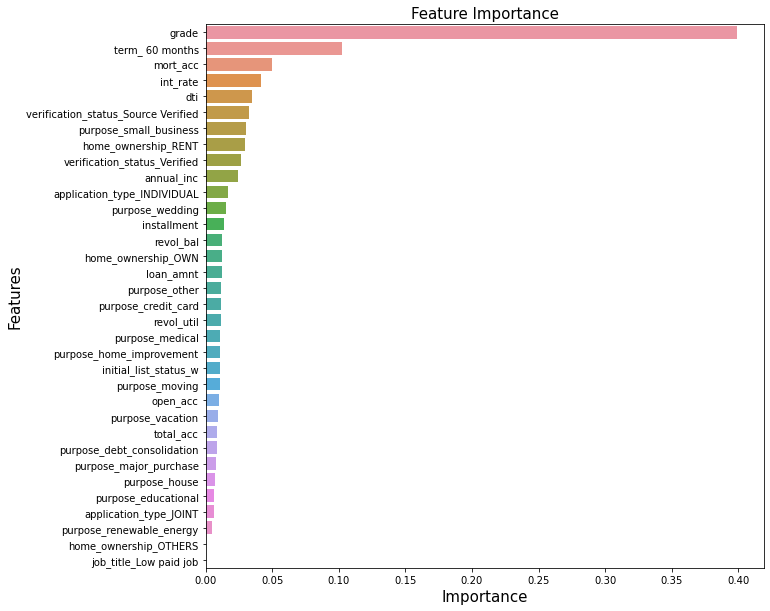

In [14]:
plt.rcParams['figure.figsize']=(10,10)
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': xgb_model_hy.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# Stack model(randomforest,knn,baysmodel)

In [30]:
# consider the various algorithms as base learners
base_learners = [('dc_model', DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, max_features = 'sqrt', 
                                                     max_leaf_nodes = 2, min_samples_leaf = 1, min_samples_split = 1, 
                                                      random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(x_train, y_train)

StackingClassifier(estimators=[('dc_model',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=2,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=2,
                                                       min_samples_split=1,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [31]:
y_pred_st=stack_model.predict(x_test)

In [32]:
train_report = get_train_report(stack_model,x_train)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(stack_model,x_test)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88    183686
           1       0.46      0.31      0.37     44327

    accuracy                           0.80    228013
   macro avg       0.65      0.61      0.63    228013
weighted avg       0.77      0.80      0.78    228013

Test data:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87     78639
           1       0.41      0.28      0.33     19081

    accuracy                           0.78     97720
   macro avg       0.62      0.59      0.60     97720
weighted avg       0.75      0.78      0.76     97720



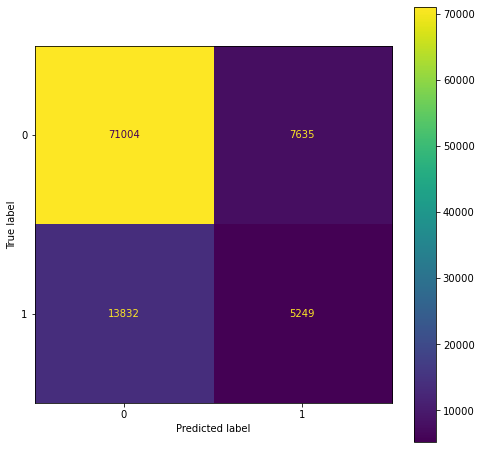

In [34]:
plt.rcParams['figure.figsize']=[8,8]
cm = confusion_matrix(y_test,y_pred_st)
ConfusionMatrixDisplay(cm).plot()
plt.show()

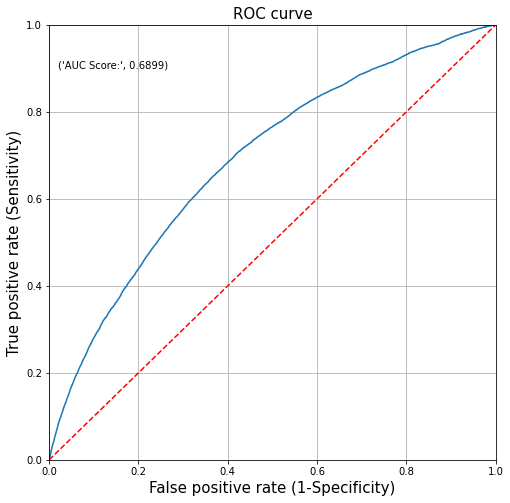

In [35]:
plot_roc(stack_model,x_test)